In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 2 notebook

## Preliminaries

In [18]:
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))

print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))

print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 2A: Individual posterior mean values for bout duration and feeding rate

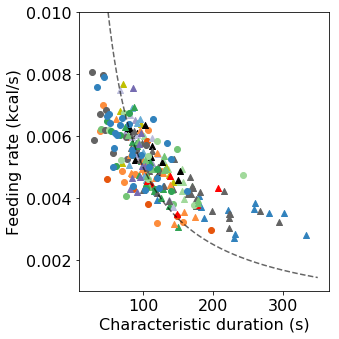

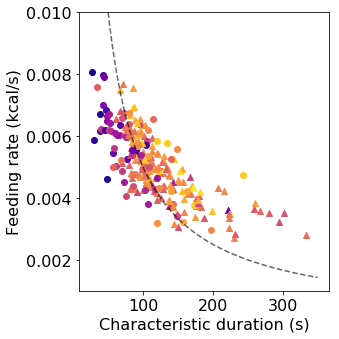

In [24]:
reload(plots)
reload(helpers)

transforms = ['pow10_inv', 'pow10']
fig, axes = plots.pairplot(df, 
                           'theta1', 
                           'theta2', 
                           ctype='drug_c', 
                           transforms = transforms)

axes.set_xlabel('Characteristic duration (s)')
axes.set_ylabel('Feeding rate (kcal/s)')

axes.set_ylim([0.001, 0.01])

const_val = 0.005*100
x = np.linspace(50, 350, 1000)
y = const_val/x

axes.plot(x,y,c='k',ls='--', alpha=0.6)

## Save figure
fig.tight_layout()
plt.savefig('figures/2B.svg')

plt.show()

## Figure 2 inset is coloured by normalised food intake
fig, axes = plots.pairplot(df, 
                           'theta1', 
                           'theta2', 
                           ctype='rate_c', 
                           transforms = ['pow10_inv', 'pow10'])

axes.set_xlabel('Characteristic duration (s)')
axes.set_ylabel('Feeding rate (kcal/s)')

axes.set_ylim([0.001, 0.01])

const_val = 0.005*100
x = np.linspace(50, 350, 1000)
y = const_val/x

axes.plot(x,y,c='k',ls='--', alpha=0.6)

## Save figure
fig.tight_layout()
plt.savefig('figures/2C.svg')

plt.show()

## Figure 2B: Trellis plot of bout duration, stomach-independent and stomach-dependent intermeal interval

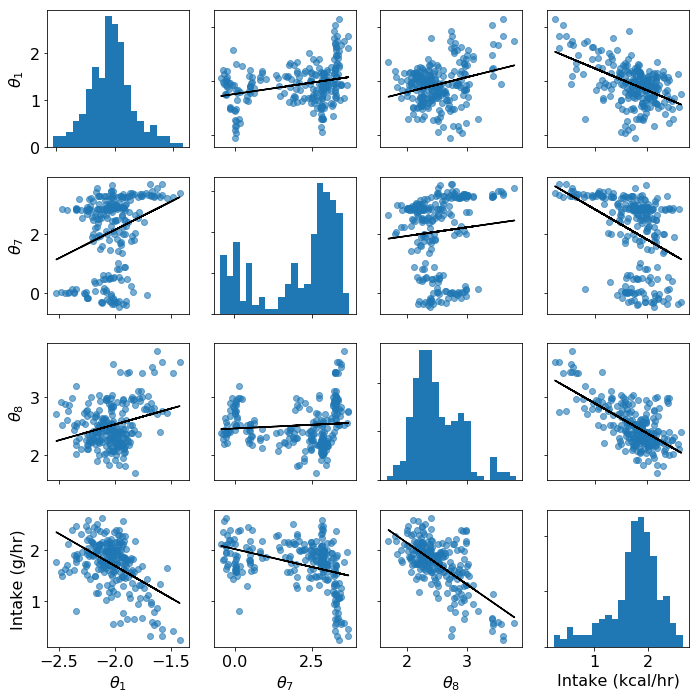

In [27]:
reload(plots)
reload(helpers)

varlist = ['theta1', 'theta7', 'theta8', 'rate']
transforms = [None, None, None, None]
fig, axes = plots.trellisplot(df, varlist, transforms)

#axes[0,0].set_ylabel()

## Set axes ticks invisible
for i in range(0, 3):
    axes[i,0].set_xticklabels([])
    
    for j in range(1,4):
        axes[3,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])

## Set x labels
axes[3,0].set_xlabel('$\\theta_{1}$')
axes[3,1].set_xlabel('$\\theta_{7}$')
axes[3,2].set_xlabel('$\\theta_{8}$')
axes[3,3].set_xlabel('Intake (kcal/hr)')

## Set y labels
axes[0,0].set_ylabel('$\\theta_{1}$')
axes[1,0].set_ylabel('$\\theta_{7}$')
axes[2,0].set_ylabel('$\\theta_{8}$')
axes[3,0].set_ylabel('Intake (g/hr)')
        
## Save figure
fig.tight_layout()
plt.savefig('figures/2A.svg')

plt.show()

## Figure 2C, 2D: Group-level posteriors of bout duration and intake rate for PYY

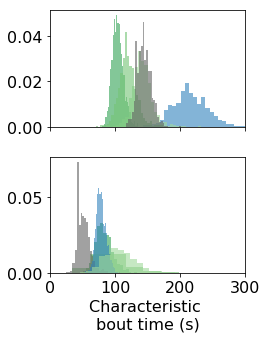

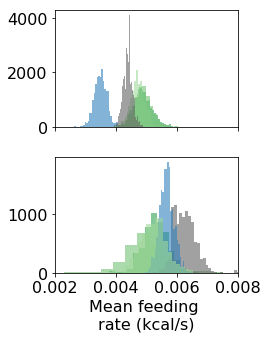

In [30]:
reload(plots)
reload(helpers)

groups_to_use = ['saline_0.0_R_D_trace.p', 
                 'saline_0.0_R_L_trace.p', 
                 'saline_0.0_A_D_trace.p', 
                 'saline_0.0_A_L_trace.p',
                 'PYY_300.0_A_D_trace.p',
                 'PYY_7.5_A_D_trace.p',
                 'PYY_1.5_A_D_trace.p',
                 'PYY_300.0_R_L_trace.p',
                 'PYY_7.5_R_L_trace.p',
                 'PYY_1.5_R_L_trace.p']

## Bout duration under PYY administration
fig, axes = plots.univariate_posterior(group_dict, 
                                       0, 
                                       groups_to_use, 
                                       numbins=30,
                                       transform='pow10_inv')

axes[0].set_xlim([0, 300])
axes[0].set_xticklabels([])
axes[1].set_xlim([0, 300])
axes[1].set_xlabel('Characteristic \nbout time (s)')

plt.subplots_adjust(hspace=0.05) # adjust spacing

## Save figure
fig.tight_layout()
plt.savefig('figures/2D.svg')

## Feeding rate under PYY administration
fig, axes = plots.univariate_posterior(group_dict, 
                                       1, 
                                       groups_to_use, 
                                       numbins=30,
                                       transform='pow10')

axes[0].set_xlim([0.002, 0.008])
axes[0].set_xticklabels([])
axes[1].set_xlim([0.002, 0.008])
axes[1].set_xlabel('Mean feeding \nrate (kcal/s)')

plt.subplots_adjust(hspace=0.05) # adjust spacing

## Save figure
fig.tight_layout()
plt.savefig('figures/2E.svg')

plt.show()

## Figure 2E, 2F: Group-level posteriors of bout duration and intake rate for LiCl and GLP-1

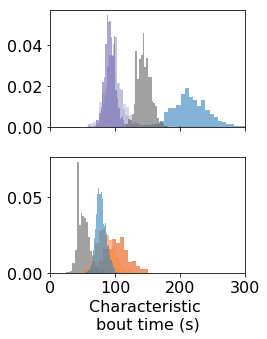

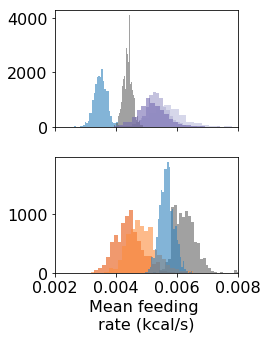

In [34]:
reload(plots)
reload(helpers)

groups_to_use = ['saline_0.0_R_D_trace.p', 
                 'saline_0.0_R_L_trace.p', 
                 'saline_0.0_A_D_trace.p', 
                 'saline_0.0_A_L_trace.p',
                 'LiCl_32.0_R_L_trace.p',
                 'LiCl_64.0_R_L_trace.p',
                 'GLP-1_300.0_A_D_trace.p',
                 'GLP-1_100.0_A_D_trace.p',
                 'GLP-1_30.0_A_D_trace.p']

## Bout duration under drug administration
fig, axes = plots.univariate_posterior(group_dict, 
                                       0, 
                                       groups_to_use, 
                                       numbins=30,
                                       transform='pow10_inv')

axes[0].set_xlim([0, 300])
axes[0].set_xticklabels([])
axes[1].set_xlim([0, 300])
axes[1].set_xlabel('Characteristic \nbout time (s)')

plt.subplots_adjust(hspace=0.05) # adjust spacing

## Save figure
fig.tight_layout()
plt.savefig('figures/2F.svg')

## Feeding rate under drug administration
fig, axes = plots.univariate_posterior(group_dict, 
                                       1, 
                                       groups_to_use, 
                                       numbins=30,
                                       transform='pow10')

axes[0].set_xlim([0.002, 0.008])
axes[0].set_xticklabels([])
axes[1].set_xlim([0.002, 0.008])
axes[1].set_xlabel('Mean feeding \nrate (kcal/s)')

plt.subplots_adjust(hspace=0.05) # adjust spacing

## Save figure
fig.tight_layout()
plt.savefig('figures/2G.svg')

plt.show()